In [17]:
import pandas as pd
import json

data_path = "./MovieSummaries/"

## Movie metadata

In [68]:

metadata_path = data_path + "movie.metadata.tsv"

df_movie = pd.read_csv(metadata_path, sep="\t", header=None)
df_movie.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Name', 'Release date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres']

print(df_movie.shape)
df_movie.head()

(81741, 9)


,Wikipedia movie ID,Freebase movie ID,Name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


### Number of movies per country

In [62]:
# Number of movies per country in the dataset

from collections import defaultdict, Counter

def read_metadata(metadata_path):
    df = pd.read_csv(metadata_path, sep="\t", header=None)
    results = Counter()
    for i in range(len(df)):
        for k,v in json.loads(df.loc[i, 7]).items():
            results[v] += 1
    return results

results = read_metadata(metadata_path)
print("- Number of different countries: {}".format(len(results)))
print("- Most productive: ")
print(sorted(results.items(), reverse=True, key=lambda x:x[1])[:50])

- Number of different countries: 147
- Most productive: 
[('United States of America', 34408), ('India', 8411), ('United Kingdom', 7868), ('France', 4395), ('Italy', 3163), ('Japan', 2647), ('Canada', 2534), ('Germany', 2393), ('Argentina', 1468), ('Hong Kong', 1240), ('Spain', 1136), ('Australia', 1114), ('South Korea', 887), ('Mexico', 870), ('Netherlands', 840), ('Sweden', 657), ('West Germany', 647), ('China', 645), ('Denmark', 610), ('Soviet Union', 564), ('Philippines', 389), ('Poland', 382), ('Czechoslovakia', 376), ('Belgium', 360), ('New Zealand', 355), ('Norway', 345), ('Russia', 345), ('Hungary', 325), ('German Democratic Republic', 322), ('Yugoslavia', 306), ('Brazil', 298), ('Ireland', 287), ('Switzerland', 280), ('Austria', 267), ('Finland', 247), ('Czech Republic', 240), ('Israel', 235), ('Turkey', 215), ('England', 211), ('Iran', 209), ('Thailand', 208), ('South Africa', 200), ('Greece', 192), ('Pakistan', 189), ('Taiwan', 176), ('Portugal', 167), ('Croatia', 155), ('Eg

### Number of movies per genre

In [72]:
# Number of movies per genre in the dataset

from collections import defaultdict, Counter

results = Counter()
movie2genre = defaultdict(list)
for i in range(len(df)):
    for k,v in json.loads(df_movie.loc[i, "Genres"]).items():
        results[v] += 1
        movie2genre[df_movie.loc[i, "Freebase movie ID"]].append(v)

print("- Number of different genres: {}".format(len(results)))
print("- Most popular (in term of number of movies): ")
print(sorted(results.items(), reverse=True, key=lambda x:x[1])[:50])

- Number of different genres: 363
- Most popular (in term of number of movies): 
[('Drama', 34007), ('Comedy', 16349), ('Romance Film', 10234), ('Black-and-white', 9094), ('Action', 8798), ('Thriller', 8744), ('Short Film', 8141), ('World cinema', 7155), ('Crime Fiction', 6948), ('Indie', 6897), ('Documentary', 5630), ('Horror', 5280), ('Silent film', 5250), ('Adventure', 4963), ('Family Film', 4598), ('Action/Adventure', 4561), ('Comedy film', 4362), ('Musical', 4160), ('Animation', 3534), ('Romantic drama', 3372), ('Mystery', 3195), ('Science Fiction', 3052), ('Fantasy', 2820), ('Romantic comedy', 2680), ('War film', 2652), ('Japanese Movies', 2322), ('Western', 2226), ('Crime Thriller', 2122), ('Period piece', 1758), ('Comedy-drama', 1720), ('Film adaptation', 1531), ('Chinese Movies', 1525), ('Biography', 1392), ('Psychological thriller', 1331), ('Bollywood', 1321), ('Sports', 1206), ('Biographical film', 1198), ('LGBT', 1163), ('Music', 1088), ('Family Drama', 1043), ('Black comed

## Characters

In [37]:
import pandas as pd

data_path = "./MovieSummaries/"
character_path = data_path + "character.metadata.tsv"

df_character = pd.read_csv(character_path, sep="\t", header=None)
df_character.columns = [
    'Wikipedia movie ID', 
    'Freebase movie ID', 
    'Movie release date',
    'Character name',
    'Actor date of birth', 
    'Actor gender', 
    'Actor height(in meters)', 
    'Actor ethnicity(Freebase ID)', 
    'Actor name', 
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]
print(df_character.shape)
df_character.head()

(450669, 13)


,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height(in meters),Actor ethnicity(Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Genres of movies for each actor

In [69]:
num_movie_per_actor = df_character.groupby(["Actor name"])["Actor name"].count().sort_values(ascending=False)

num_actors = 10

actors = num_movie_per_actor.index[:num_actors]
num_movies = num_movie_per_actor.values[:num_actors]
print("{} most productive actors:".format(num_actors))
for actor, num in zip(actors, num_movies):
    print(" - Actor '{}' makes {} movies. ".format(actor, num))

10 most productive actors:
 - Actor 'Mel Blanc' makes 791 movies. 
 - Actor 'Mithun Chakraborty' makes 328 movies. 
 - Actor 'Oliver Hardy' makes 299 movies. 
 - Actor 'Mohanlal' makes 234 movies. 
 - Actor 'Moe Howard' makes 225 movies. 
 - Actor 'Mammootty' makes 225 movies. 
 - Actor 'Dharmendra Deol' makes 219 movies. 
 - Actor 'Larry Fine' makes 219 movies. 
 - Actor 'Amitabh Bachchan' makes 206 movies. 
 - Actor 'Prakash Raj' makes 205 movies. 


In [93]:
# genre of movies performed by these actors

for actor,tot_num in zip(actors,num_movies):
    genre_count = Counter()
    for index, row in df_character[df_character["Actor name"] == actor].iterrows():
        for genre in movie2genre[row["Freebase movie ID"]]:
            genre_count[genre] += 1
    genre, cnt = genre_count.most_common(1)[0]
    print("Actor {:20s} performed  {}/{}  movies of genre '{}'. ".format(actor, cnt, tot_num, genre))

Actor Mel Blanc            performed  640/791  movies of genre 'Short Film'. 
Actor Mithun Chakraborty   performed  171/328  movies of genre 'Action'. 
Actor Oliver Hardy         performed  282/299  movies of genre 'Black-and-white'. 
Actor Mohanlal             performed  148/234  movies of genre 'Drama'. 
Actor Moe Howard           performed  206/225  movies of genre 'Comedy'. 
Actor Mammootty            performed  147/225  movies of genre 'Drama'. 
Actor Dharmendra Deol      performed  104/219  movies of genre 'Drama'. 
Actor Larry Fine           performed  204/219  movies of genre 'Comedy'. 
Actor Amitabh Bachchan     performed  126/206  movies of genre 'World cinema'. 
Actor Prakash Raj          performed  115/205  movies of genre 'Drama'. 


## TV Tropes Clusters

The number of actors in this datasets is only 350 while the total number of actors in `df_character` is 134079. 

In [13]:
import pandas as pd

data_path = "./MovieSummaries/"
char_cluster_path = data_path + "tvtropes.clusters.txt"

In [108]:
import json

def read_tvtropes(char_cluster_path):
    df = pd.read_csv(char_cluster_path, sep='\t', header=None)
    df.columns = ['type', 'raw info']
    # extract information from "Rzw Info"
    for i in range(len(df)):
        char_info = json.loads(df.loc[i, 'raw info'])
        for name,val in char_info.items():
            df.loc[i, name.title()] = val
    df.drop('raw info', axis=1, inplace=True)
    return df

df_chartype = read_tvtropes(char_cluster_path)
print(df_chartype.shape)
df_chartype.head()

(501, 5)


,type,Char,Movie,Id,Actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [109]:
num_actor_chartype = len(df_chartype["Actor"].unique())
num_actor_character = len(df_character["Actor name"].unique())
num_actor_common = len(set(df_chartype["Actor"].values) & set(df_character["Actor name"]))

print("{} \tactors in df_chartype".format(num_actor_chartype))
print("{} \tactors in df_character".format(num_actor_character))
print("{} \tactors in common".format(num_actor_common))

350 	actors in df_chartype
134079 	actors in df_character
350 	actors in common


In [110]:
df_chartype["Actor"].value_counts()

Robert De Niro    9
Johnny Depp       8
Harrison Ford     8
Clint Eastwood    7
Daniel Craig      5
                 ..
Richard Gere      1
Larry Miller      1
Norman Lloyd      1
Jeffrey Jones     1
Kevin Costner     1
Name: Actor, Length: 350, dtype: int64

In [139]:
# results = df_chartype.join(df_character, on="Actor")
# results = pd.merge(df_chartype[["Actor"]], df_character[["Actor name"]].groupby("Actor name").count(), how='left', left_on=['Actor'], right_on=['Actor name'])
results = df_chartype["Actor"].copy()
results["movie count"] = df_chartype["Actor"].replace(df_character["Actor name"].value_counts().to_dict())
results.sort_values("movie count").head()

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [137]:
results.sort_values("movie count").tail()

,Actor,movie count
248,Naseeruddin Shah,112
277,Michael Caine,121
447,Michael Caine,121
398,Christopher Lee,152
243,John Wayne,178


<AxesSubplot:title={'center':'number of movies produced per actor, in df_chartype'}, ylabel='Frequency'>

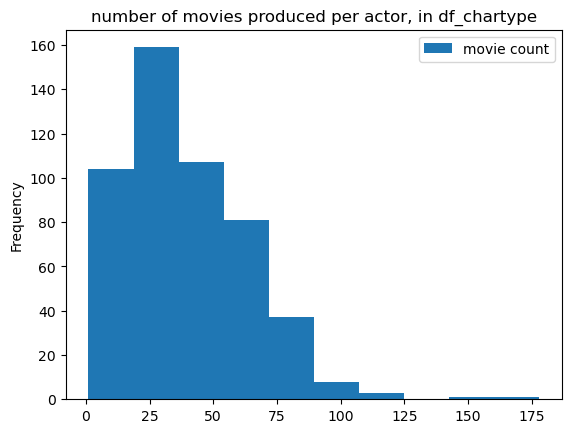

In [136]:
results.sort_values("movie count").plot(kind="hist", title="number of movies produced per actor, in df_chartype")

In [126]:
df_character[["Actor name"]].groupby("Actor name").count()

""
Actor name
Cesarine Prinz\t
Daniel Newman
'Big Bill' Giddinger
'Big' Lee
'Chicken' Holleman
...
雅-miyavi-
雪乃五月
高山久子
